# US-Workshop (2023): ULTRASOUND IMAGING
<hr/>

## EX3: B-mode Image Quality Figure of Merit
* In this notebook, we process B-mode images acquired using Plane Wave Imaging (PWI) technique.
* The task is to evaluate CNR metric (contrast-to-noise ratio) of the reconstructed images and observe how the number of TX/RX plane waves affects the final image quality.
* All data and algorithms were published as part of PICMUS competition (now open-source database).

### TOC
* [Load reconstructed PWI images and phantom information](#load-reconstructed-pwi-images-and-phantom-information)
* [Preview image data structure](#preview-image-data-structure)
* [Calculate CNR](#calculate-cnr)

### LINKS
1. [PICMUS](https://www.creatis.insa-lyon.fr/Challenge/IEEE_IUS_2016/home)
2. [H.Liebgott et al., Plane-wave imaging challenge in medical ultrasound](https://ieeexplore.ieee.org/abstract/document/7728908)


[![Lab4US](../figs/Lab4US-banner-EN-800.png)](https://lab4us.eu)
<hr/>

In [1]:
import h5py
from us_classes import US_RecoImage, US_Phantom, US_Contrast

## Load reconstructed PWI images and phantom information

In [2]:
#%% LOAD ULTRASOUND IMAGE DATA in HDF5 format

data_path = r'../data/ex3-imaging/experiments'

ph_filename = '/contrast_speckle_expe_phantom.hdf5'
phantom = h5py.File(data_path+ph_filename, "r")
processed_phantom = US_Phantom(data_path + ph_filename)

im_filename = '/contrast_speckle_expe_img_from_rf.hdf5'
image = h5py.File(data_path+im_filename, "r")
processed_image = US_RecoImage(data_path + im_filename)

### Preview image data structure

In [3]:
for group in image.keys():
    print(group)
    for dset in image[group].keys():
        print(dset)
        ds_data = image[group][dset]  # returns HDF5 dataset object
        print(ds_data)
        for next_set in ds_data.keys():
            print(next_set)

# for group in phantom.keys():
#     print(group)
#     for dset in phantom[group].keys():
#         print(dset)
#         ds_data = phantom[group][dset]  # returns HDF5 dataset object
#         print(ds_data)
#         for next_set in ds_data.keys():
#             print(next_set)

US
US_DATASET0000
<HDF5 group "/US/US_DATASET0000" (7 members)>
data
number_plane_waves
receive_apodization_window
receive_f_number
scan
transmit_apodization_window
transmit_f_number


## Calculate CNR 
Calc CNR values for variable number of Plane-Waves per image.


 DAS Beamforming for 1 plane waves:
Mean image contrast score (dB): 8.15 


 DAS Beamforming for 3 plane waves:
Mean image contrast score (dB): 7.3 


 DAS Beamforming for 11 plane waves:
Mean image contrast score (dB): 11.25 


 DAS Beamforming for 75 plane waves:
Mean image contrast score (dB): 12.0 



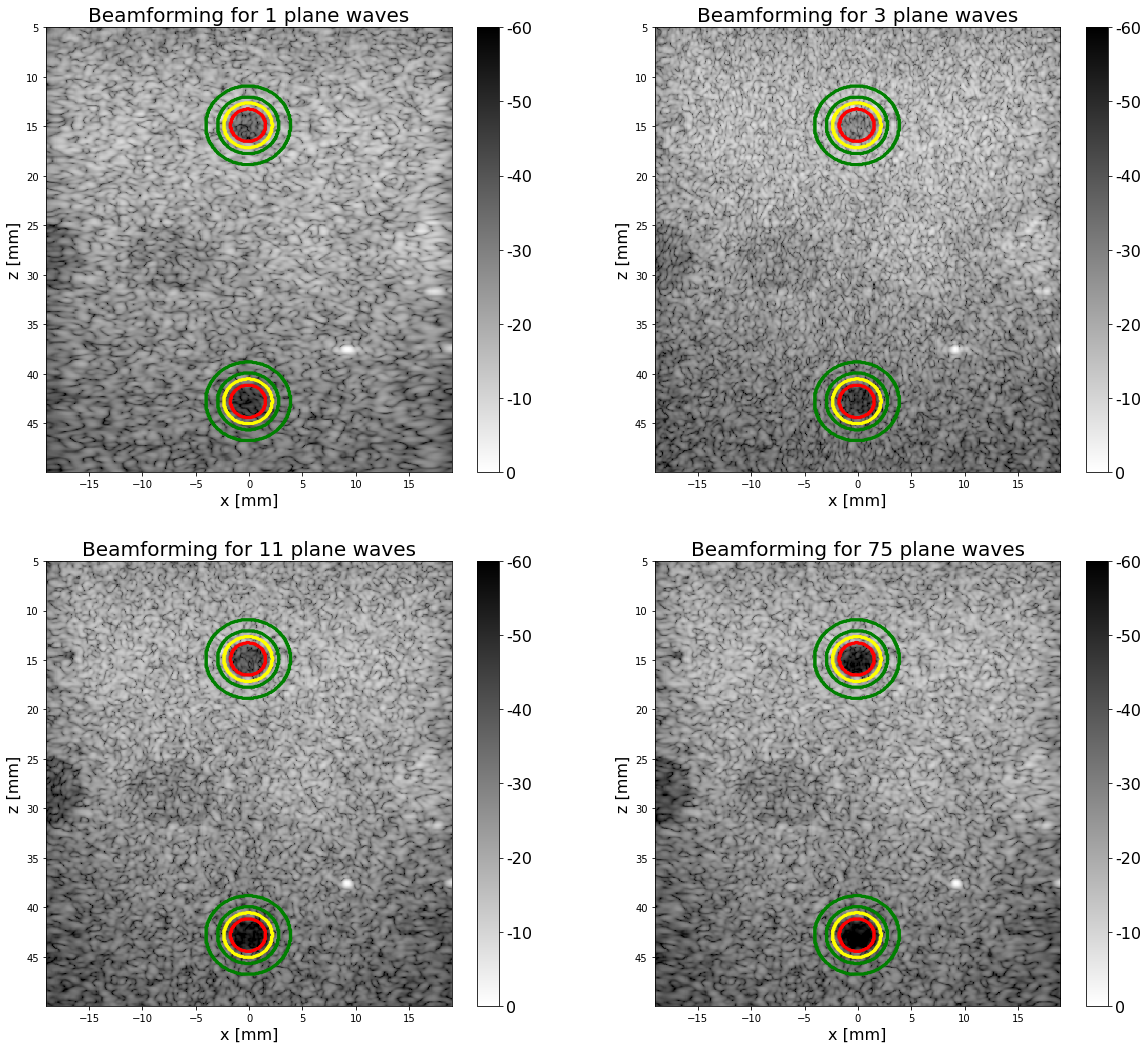

In [4]:
processed_contrast = US_Contrast(processed_phantom, processed_image, 1)
processed_contrast.evaluate()

In [ ]:
print('CNR (all):\n', processed_contrast.score)